In [1]:
# modules we'll use
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

<pre style='font-size : 15px;'>The function <b>load_data</b> loads the data given its name.</a> </pre>

In [2]:
def load_data(file):
    url = 'https://raw.githubusercontent.com/HikkaV/VNTU-ML-Courses/master/assignments/data_science/files/{}'.format(file)
    try:
        df = pd.read_csv('../files/{}'.format(file))
    except:
        df = pd.read_csv(url)
    return df

In [3]:
# read in our data
crime = load_data('crime.csv')

# set seed for reproducibility
np.random.seed(0)

<pre style='font-size : 15px;'>let's start by looking at the first 5 rows to get a feel</a> </pre>

In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


<pre style='font-size : 15px;'>As a rule of thumb we should check data amount.
Le'ts do this using <b>.len()</b> function. </pre>

In [5]:
len(crime)

835

<pre style='font-size : 15px;'>It's quite a small and concise dataset but there should be quite a lot that can be done with regards to EDA on this.
So let's get started from the left to the right with the "Category" column.</pre>

<pre style='font-size : 18px'><b>Which are the most common categories of crime committed?</b></pre>

<pre style='font-size : 15px;'>Here, we will take a quick look at some summary aggregates to see what was the most common category of crime that was registered or committed.
For this purpose pandas <b>value_counts()</b> method should be used, which outputs the volume (number of) crimes grouped per category.</pre>

In [6]:
crime.Category.value_counts()

,count
Category,
LARCENY/THEFT,223
NON-CRIMINAL,102
OTHER OFFENSES,98
ASSAULT,60
VEHICLE THEFT,54
VANDALISM,40
BURGLARY,39
SUSPICIOUS OCC,35
MISSING PERSON,27


<pre style='font-size : 15px;'>Numbers looks good, but let's compare it to visual presentation.
To do that we should first create separate data frame wich containing previous result.
And second - plot the chart.</pre>

In [7]:
category = pd.DataFrame(list(zip(crime.Category.value_counts().index,crime.Category.value_counts())), columns=['Category','value'], index=None)

<pre style='font-size : 15px;'>Consider to check if we are right.</pre>

In [8]:
category.head()

,Category,value
0,LARCENY/THEFT,223
1,NON-CRIMINAL,102
2,OTHER OFFENSES,98
3,ASSAULT,60
4,VEHICLE THEFT,54


<pre style='font-size : 15px;'>Plotting the data using <b>catplot</b> from seaborn.</pre>

<ipython-input-9-069ebb5713c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='value', y = 'Category', data=category, kind="bar", height=4.25, aspect=1.9, palette="cubehelix")


Text(0.5, 1.0, 'Catplot of the category of crime and number of occurences ')

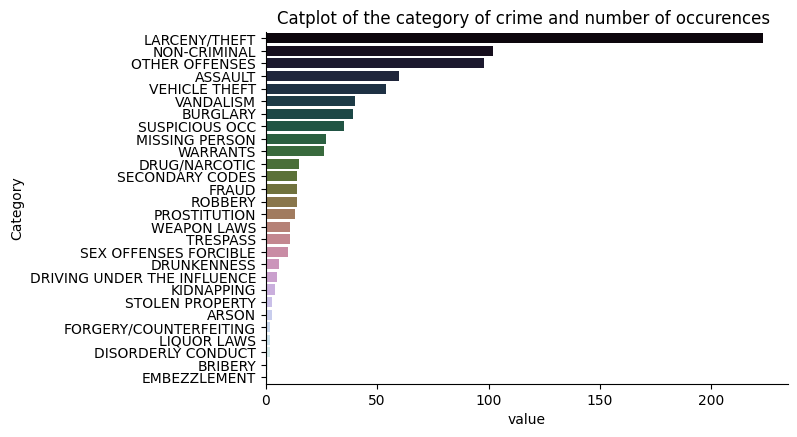

In [9]:
sns.catplot(x='value', y = 'Category', data=category, kind="bar", height=4.25, aspect=1.9, palette="cubehelix")
plt.title('Catplot of the category of crime and number of occurences ')

<pre style='font-size : 15px;'>What about yet one more nice representaion of same data - wordcloud.
</pre>

In [10]:
wordcloud = WordCloud(
                    stopwords=STOPWORDS,
                    background_color='black',
                    width=1200,
                    height=800
                    ).generate(" ".join(category['Category'].values))

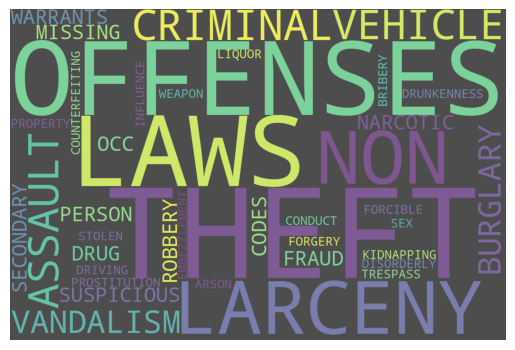

In [11]:
plt.imshow(wordcloud, alpha=0.7)
plt.axis('off')
plt.show()

<pre style='font-size : 15px;'>From all data visualizations result is the same: THEFT is most common crime in this dataset.</pre>

<pre style='font-size : 18px'><b>Most common crimes carried out per it's description?</b></pre>

<pre style='font-size : 15px;'>The code and visualisation here in this section will be carried out much like in the previous one.
We will also look at summary aggregates of the counts per description type.</pre>


In [12]:
crime.Descript.value_counts()

,count
Descript,
GRAND THEFT FROM LOCKED AUTO,76
STOLEN AUTOMOBILE,30
PETTY THEFT OF PROPERTY,30
"AIDED CASE, MENTAL DISTURBED",30
BATTERY,22
...,...
AIDED CASE -PROPERTY FOR DESTRUCTION,1
TRANSPORTATION OF MARIJUANA,1
ATTEMPTED STOLEN VEHICLE,1


<pre style='font-size : 15px;'>This column contains a lot more detailed information about the type of the crime committed.
And right-away we can observe that Grand Theft Auto is the most common crime description in this area.
Again, we create another dataframe which will make it convenient for the plotting.</pre>


In [13]:
descript = pd.DataFrame(list(zip(crime.Descript.value_counts().index,crime.Descript.value_counts())), columns=['Description','counts'], index=None)

In [14]:
descript_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1500,
                          height=1400
                         ).generate(" ".join(descript['Description'].values))

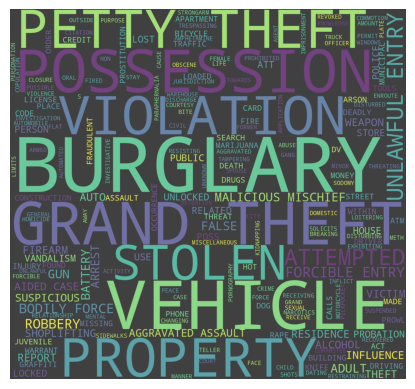

In [15]:
plt.imshow(descript_cloud,alpha=0.75)
plt.axis('off')
plt.show()

<pre style='font-size : 18px'><b>Day on which there is most crime?</b></pre>

<pre style='font-size : 15px'>Consider we want to go for a walk at Saturday.
But wait, maybe it's safer to go at the other day, let's take a look.</pre>

In [16]:
DOW = pd.DataFrame(list(zip(crime.DayOfWeek.value_counts(),crime.DayOfWeek.value_counts().index)), columns=['count','Day'], index=None)

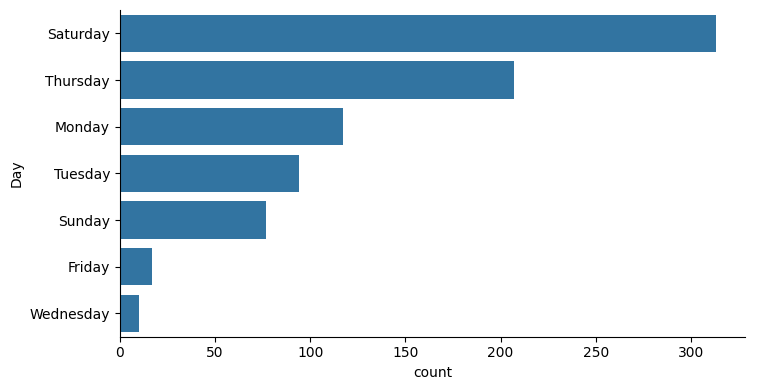

In [17]:
sns.catplot(x="count", y="Day", data = DOW, kind="bar", height=4, aspect=1.9)


<pre style='font-size : 15px'>Oh, good that we know essential DS, it tend to make us safe and not go outside in dangerous days.</pre>

<pre style='font-size : 18px'><b>How good crimes are being resolved?</b></pre>

<pre style='font-size : 15px'>Let's go onto the "Resolution" column and look at the summary statistics.
Hopefully we find that many of these crimes have been successfully "resolved".</pre>



In [18]:
Resolution = pd.DataFrame(list(zip(crime.Resolution.value_counts().index,crime.Resolution.value_counts())), columns=['resolution','value'], index=None)

In [19]:
rescloud = WordCloud(
                    stopwords=STOPWORDS,
                    background_color='black',
                    width=1500,
                    height=1400
                    ).generate(" ".join(Resolution['resolution'].values))

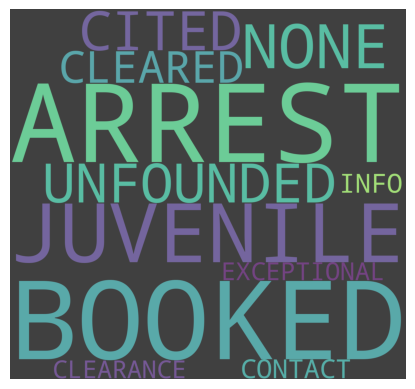

In [20]:
plt.imshow(rescloud, alpha=0.75)
plt.axis('off')
plt.show()

<ipython-input-21-9284a29d9c20>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='value' , y = 'resolution', data=Resolution, kind="bar", height=3.25, aspect=2.5, palette='BuGn_r')


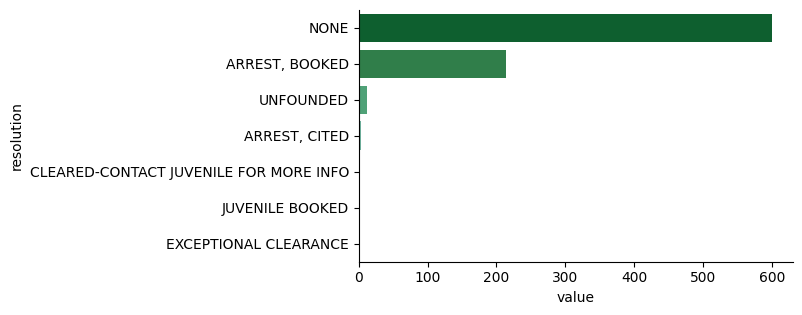

In [21]:
sns.catplot(x='value' , y = 'resolution', data=Resolution, kind="bar", height=3.25, aspect=2.5, palette='BuGn_r')

<pre style='font-size : 15px'>NONE means that most of crimes in this dataset are not resolved...</pre>



<pre style='font-size :25px; text-align: center'><b>SUMMARY</b></pre>

<pre style='font-size :15px'>We have performed multiple actions in order to test and understand crime dataset using charts, word cloud, basic dataframe transformations.
Even few simple steps discover many interesting facts regarding the data, for example most of crimes were not resolved, or information that most common crime is THEFT, etc...
Can one imagine what kind of hidden information can be exploited if we dive deeper and deeper.
</pre>


<pre style='font-size : 18px'><b>Try it yourself</b></pre>

*Try to ask few more questions to the data and answer them*

*X and Y columns (that coresspond to latitude and longitude or vise versa) are left antached for you:*
Investigate how to plot this data on a map, maybe there is a pattern?

**Task with a star**

*   Can we predict crimes in advance?
*   Does this dataset contain sufficient data to be used for predictive analysis?

Come back here after a while and try to answer listed questions.